In [1]:
import tensorflow as tf

In [2]:
(mnist_images, mnist_labels), _ = tf.keras.datasets.mnist.load_data()

dataset = tf.data.Dataset.from_tensor_slices((tf.cast(mnist_images[..., tf.newaxis]/255, tf.float32), tf.cast(mnist_labels,tf.int64)))
dataset = dataset.shuffle(1000).batch(32)

In [4]:
mnist_model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(16,[3,3], activation='relu', input_shape=(None, None, 1)),
    tf.keras.layers.Conv2D(16,[3,3], activation='relu'),
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(10)
])

In [5]:
optimizer = tf.keras.optimizers.Adam()
loss_object = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

loss_history = []

In [6]:
def train_step(images, labels):
    with tf.GradientTape() as tape:
        logits = mnist_model(images, training=True)
        
        tf.debugging.assert_equal(logits.shape, (32, 10))
        
        loss_value = loss_object(labels, logits)
        
    loss_history.append(loss_value.numpy().mean())
    grads = tape.gradient(loss_value, mnist_model.trainable_variables)
    optimizer.apply_gradients(zip(grads, mnist_model.trainable_variables))

In [7]:
def train(epochs):
    for epoch in range(epochs):
        for (batch, (images, labels)) in enumerate(dataset):
            train_step(images, labels)
        print('Epoch {} finished'.format(epoch))

In [8]:
train(3)

Epoch 0 finished
Epoch 1 finished
Epoch 2 finished


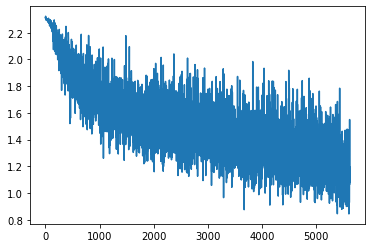

In [9]:
import matplotlib.pyplot as plt

plt.plot(loss_history)